In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm

In [28]:
df = yf.download("^AXJO", "2003-01-01", "2023-03-02")
returns = df["Close"].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


Date
2003-01-03    0.009215
2003-01-06    0.006513
2003-01-07   -0.000293
2003-01-08    0.000065
2003-01-09   -0.003187
                ...   
2023-02-23   -0.003978
2023-02-24    0.002965
2023-02-27   -0.011250
2023-02-28    0.004651
2023-03-01   -0.000937
Name: Close, Length: 5094, dtype: float64

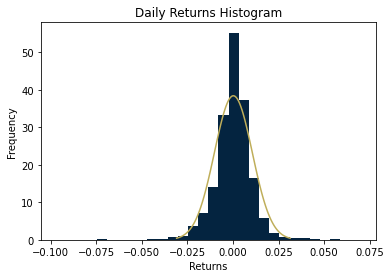

In [41]:
mu, std = norm.fit(returns)


plt.hist(returns, bins=30, density=True, color="#042440")
plt.title('Daily Returns Histogram')
plt.xlabel('Returns')
plt.ylabel('Frequency')

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='#BFAE5A')

plt.show()



C:\Users\USER\AppData\Local\Temp/ipykernel_18772/2051565687.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='#BFAE5A')


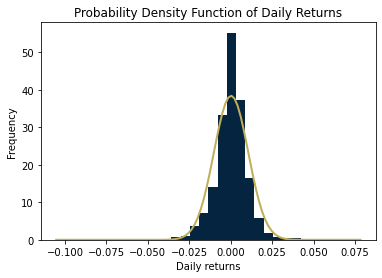

In [49]:
# Create a histogram
plt.hist(returns, bins=30, density=True,color="#042440")

# Fit a probability density function
mu, std = norm.fit(returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2, color='#BFAE5A')
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.title('Probability Density Function of Daily Returns')
plt.show()


In [50]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0130819
95%                      -0.0168543
99%                      -0.0239309


### Historic Stimulation

In [52]:
returns.sort_values(inplace = True, ascending =  True)
# Calculate the VaR for 90%, 95%, and 99% confidence levels using quantile function
VaR_90 = returns.quantile(0.1)
VaR_95 = returns.quantile(0.05)
VaR_99 = returns.quantile(0.09)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0111369
95%                      -0.0161037
99%                      -0.0118305
